<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Assignment_1_Pineapple_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;font-weight: bold;font-size:40px">Assignment 1 - Pandas, Matplotlib, and Seaborn</span>

Let's analyze 911 call data from Kaggle. The dataset includes the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address

a) Import numpy,pandas, matplotlib, and seaborn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

b) Read the CSV file into a DataFrame.

In [ ]:
df = pd.read_csv("911.csv")

c) Check the info() and the head().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Questions and exercises

1- What are the top 5 zipcodes for 911 calls? (5 pts)

In [ ]:
df_zip = df['zip']

In [ ]:
df_zip.value_counts()

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174
...,...
19119.0,1
77316.0,1
19457.0,1


2- What are the top 5 townships (twp) for 911 calls? (5 pts)

In [ ]:
df_town = df['twp']

In [ ]:
df_town

,twp
0,NEW HANOVER
1,HATFIELD TOWNSHIP
2,NORRISTOWN
3,NORRISTOWN
4,LOWER POTTSGROVE
...,...
99487,NORRISTOWN
99488,LOWER MERION
99489,NORRISTOWN
99490,HORSHAM


3- In the title column, the 'Reason/Department' is specified before the title code, such as EMS, Fire, and Traffic. Use the .apply() method with a custom lambda function to create a new column called Reason that extracts this value.

For example, if the value in the title column is EMS: BACK PAINS/INJURY, the corresponding value in the Reason column should be EMS. (5 pts)

In [ ]:
df = df.assign(Reason = df['title'].apply(lambda title: title.split(':')[0]))
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


4- What is the most common reason for a 911 call based on the values in the new Reason column? (5 pts)

In [ ]:
df['Reason'].value_counts().head(1)

,count
Reason,
EMS,48877


5- Create a count plot to visualize the number of 911 calls for each Reason. (5 pts)

<ipython-input-48-eb2c9a4d44bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette = 'mako')


<Axes: xlabel='Reason', ylabel='count'>

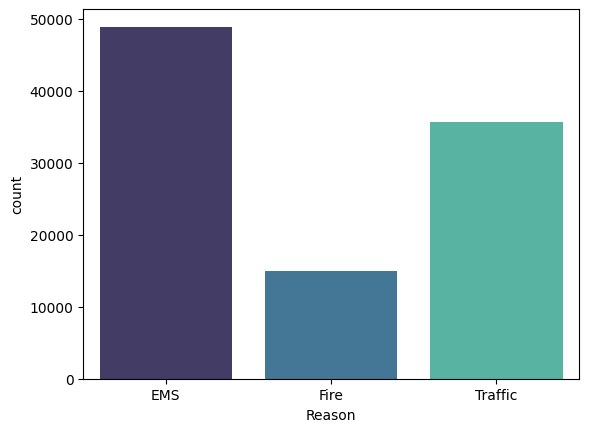

In [ ]:
sns.countplot(x='Reason', data=df, palette = 'mako')

6- Use pd.to_datetime() to convert the timeStamp column from strings to DateTime objects. (5 pts)

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99492 entries, 0 to 99491
Series name: timeStamp
Non-Null Count  Dtype         
--------------  -----         
99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.4 KB


7- Now that the timeStamp column has been converted to DateTime objects, you can extract specific attributes by calling them. For example:

time = df['timeStamp'].iloc[0]
time.hour

You can use Jupyter's tab-completion feature to explore the various attributes available for a DateTime object.

Use the .apply() method to create three new columns: Hour, Month, and Day of Week. These columns should be derived from the timeStamp column. (10 pts)

In [ ]:
df=df.assign(Hour=df['timeStamp'].apply(lambda time: time.hour))

In [ ]:
df=df.assign(Month=df['timeStamp'].apply(lambda time: time.month))

In [ ]:
df=df.assign(Day_of_Week=df['timeStamp'].apply(lambda time: time.day_of_week))

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


8- Notice that the Day of Week column contains integers ranging from 0 to 6, representing the days of the week. Use the .map() method with the following dictionary to map these integers to their corresponding day names:

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

(5 pts)

In [ ]:
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

In [ ]:
df['Day_of_Week'] = df['Day_of_Week'].map(day_map)

In [ ]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wednesday
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wednesday
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wednesday
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wednesday


9- Create a count plot of the Day of Week column, using the hue parameter to differentiate the data based on the Reason column. (5 pts)

<Axes: xlabel='Day_of_Week', ylabel='count'>

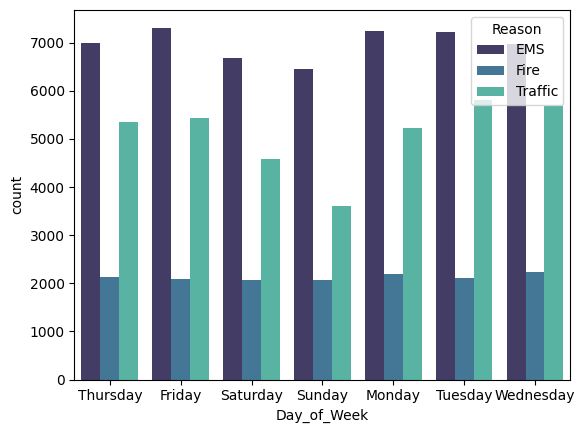

In [ ]:
sns.countplot(x='Day_of_Week', data=df, hue='Reason', palette='mako')

10- Create a count plot of the Month column, using the hue parameter to differentiate the data based on the Reason column. (5 pts)

<Axes: xlabel='Month', ylabel='count'>

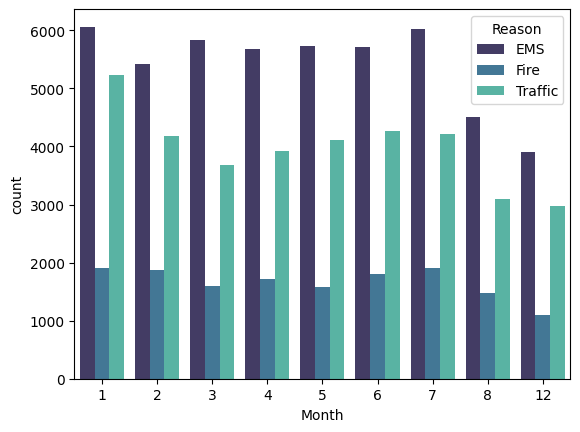

In [ ]:
sns.countplot(x='Month', data=df, hue='Reason', palette='mako')

11- Create a groupby object called byMonth, grouping the DataFrame by the Month column and using the .count() method for aggregation. (5 pts)

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


12- Create a simple line plot from the DataFrame to show the count of calls per month. (5 pts)

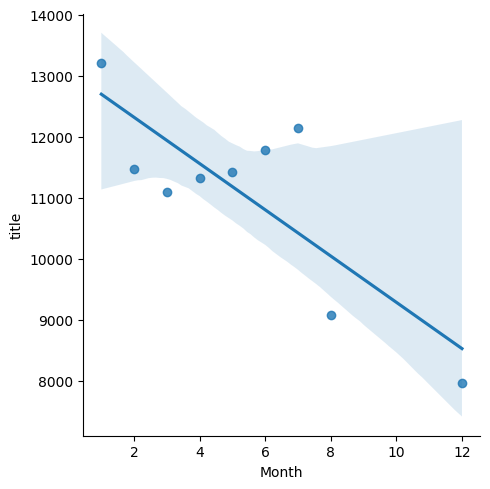

In [ ]:
sns.lmplot(x='Month', y='title', data=byMonth.reset_index())

13- Use Seaborn's lmplot() to create a linear fit showing the trend in the number of calls per month. You may need to reset the index of the byMonth DataFrame to convert it into a column for plotting. (5 pts)

In [ ]:
byMonth = byMonth.reset_index()

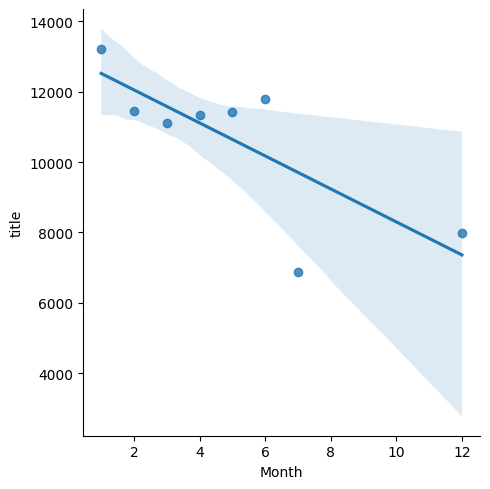

In [ ]:
sns.lmplot(x='Month', y='title', data=byMonth)

14- Next, we'll create heatmaps using Seaborn and our data. First, restructure the DataFrame so that:

* The columns represent the Hours,
* The index represents the Day of Week,
* The values represent the count of calls.
    
You can achieve this by grouping the data using groupby and then reshaping it with the .pivot_table() method. (15 pts)

In [ ]:
newdf = df.groupby(["Day_of_Week", "Hour"]).size().reset_index(name="count")
newdf = newdf.pivot_table(index="Day_of_Week", columns="Hour", values="count")
newdf

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Friday,230.0,200.0,171.0,151.0,170.0,169.0,316.0,510.0,640.0,657.0,...,803.0,815.0,867.0,849.0,731.0,596.0,590.0,483.0,465.0,396.0
Monday,242.0,196.0,178.0,171.0,166.0,222.0,349.0,585.0,682.0,680.0,...,756.0,786.0,849.0,857.0,738.0,617.0,493.0,428.0,416.0,280.0
Saturday,311.0,260.0,226.0,225.0,195.0,198.0,240.0,350.0,394.0,552.0,...,657.0,677.0,725.0,638.0,677.0,583.0,532.0,486.0,437.0,402.0
Sunday,332.0,260.0,238.0,223.0,204.0,198.0,255.0,352.0,426.0,542.0,...,588.0,590.0,560.0,617.0,583.0,564.0,469.0,396.0,351.0,290.0
Thursday,244.0,170.0,187.0,136.0,152.0,177.0,320.0,497.0,667.0,732.0,...,737.0,805.0,772.0,872.0,701.0,622.0,546.0,471.0,363.0,303.0
Tuesday,231.0,200.0,156.0,144.0,185.0,205.0,370.0,575.0,781.0,766.0,...,773.0,796.0,848.0,846.0,767.0,590.0,537.0,462.0,401.0,236.0
Wednesday,206.0,165.0,158.0,166.0,133.0,220.0,370.0,596.0,750.0,662.0,...,782.0,757.0,843.0,915.0,768.0,601.0,584.0,502.0,438.0,277.0


15- Create a heatmap using the newly structured DataFrame. (5 pts)

<Axes: xlabel='Hour', ylabel='Day_of_Week'>

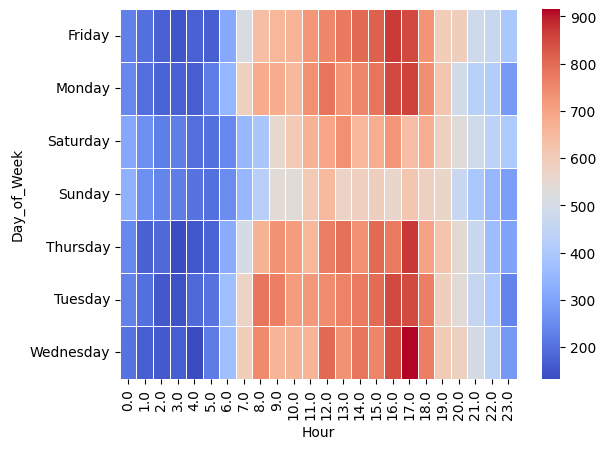

In [ ]:
sns.heatmap(newdf, cmap="coolwarm", linewidths=0.5)

16- Repeat steps #14 and #15, but this time structure the DataFrame so that:

* The Month is set as the columns,
* The Day of Week is set as the index,
* The values represent the count of calls.

    Then, create a heatmap using this newly structured DataFrame. (10 pts)

In [ ]:
newdf = df.groupby(["Day_of_Week", "Month"]).size().reset_index(name="count")
newdf = newdf.pivot_table(index="Day_of_Week", columns="Month", values="count")
newdf

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,12.0
Day_of_Week,,,,,,,,
Friday,1970.0,1581.0,1525.0,1958.0,1730.0,1649.0,1248.0,1065.0
Monday,1727.0,1964.0,1535.0,1598.0,1779.0,1617.0,1112.0,1257.0
Saturday,2291.0,1441.0,1266.0,1734.0,1444.0,1388.0,920.0,978.0
Sunday,1960.0,1229.0,1102.0,1488.0,1424.0,1333.0,962.0,907.0
Thursday,1584.0,1596.0,1900.0,1601.0,1590.0,2065.0,808.0,1266.0
Tuesday,1973.0,1753.0,1884.0,1430.0,1918.0,1676.0,938.0,1234.0
Wednesday,1700.0,1903.0,1889.0,1517.0,1538.0,2058.0,890.0,1262.0


<Axes: xlabel='Month', ylabel='Day_of_Week'>

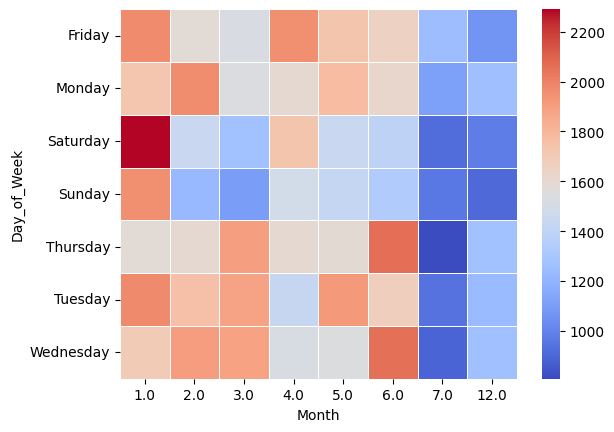

In [ ]:
sns.heatmap(newdf, cmap="coolwarm", linewidths=0.5)